***Importing Necessary Modules***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn import *
from sklearn.model_selection import KFold as kf
import warnings
warnings.filterwarnings("ignore")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="darkgrid", rc=custom_params)

***Reading Data***

In [2]:
df_ = pd.read_csv('/content/anneal.data')
df__ = pd.read_csv('/content/anneal.test')
f = open('/content/anneal.names','r')

## Question 1

### Subpart1

**Data Preprocessing**

In [3]:
columns = ['1. family','2. product-type','3. steel','4. carbon','5. hardness','6. temper_rolling','7. condition','8. formability','9. strength','10. non-ageing','11. surface-finish','12. surface-quality','13. enamelability','14. bc','15. bf','16. bt','17. bw/me','18. bl','19. m','20. chrom','21. phos','22. cbond','23. marvi','24. exptl','25. ferro','26. corr','27. blue/bright/varn/clean','28. lustre','29. jurofm','30. s','31. p','32. shape','33. thick','34. width','35. len','36. oil','37. bore','38. packing','39. class']

In [4]:
columns = [i.split('.')[1][1:] for i in columns]

In [5]:
df_.columns = columns
df__.columns = columns

In [6]:
df = pd.concat([df_,df__])

In [7]:
df.reset_index(inplace = True, drop=True)

In [8]:
## Printing Missing Values
print('Missing Values: ')
droppingColumns = []
for ci,column in enumerate(columns):
    count = 0
    for j in range(len(df)):
        if df.iloc[j , ci] == '?':
            count += 1
    if count >= 240:
        droppingColumns.append(column)
    print(column, '===>', count)

Missing Values: 
family ===> 770
product-type ===> 0
steel ===> 86
carbon ===> 0
hardness ===> 0
temper_rolling ===> 759
condition ===> 303
formability ===> 316
strength ===> 0
non-ageing ===> 791
surface-finish ===> 887
surface-quality ===> 244
enamelability ===> 880
bc ===> 895
bf ===> 767
bt ===> 822
bw/me ===> 685
bl ===> 747
m ===> 896
chrom ===> 870
phos ===> 889
cbond ===> 822
marvi ===> 896
exptl ===> 894
ferro ===> 866
corr ===> 896
blue/bright/varn/clean ===> 890
lustre ===> 845
jurofm ===> 896
s ===> 896
p ===> 896
shape ===> 0
thick ===> 0
width ===> 0
len ===> 0
oil ===> 832
bore ===> 0
packing ===> 887
class ===> 0


In [9]:
df.drop(droppingColumns, axis = 1, inplace = True)

In [10]:
df.head()

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,C,R,0,0,0,COIL,3.200,610.0,0,0,3
1,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
2,C,A,0,60,0,COIL,2.801,385.1,0,0,3
3,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
4,C,A,0,45,0,COIL,1.600,610.0,0,0,3


In [11]:
print('Missing Values: ')
droppingColumns = []
for ci,column in enumerate(df.columns):
    count = 0
    for j in range(len(df)):
        if df.iloc[j , ci] == '?':
            count += 1
    if count > 1:
        droppingColumns.append(column)
    print(column, '===>', count)

Missing Values: 
product-type ===> 0
steel ===> 86
carbon ===> 0
hardness ===> 0
strength ===> 0
shape ===> 0
thick ===> 0
width ===> 0
len ===> 0
bore ===> 0
class ===> 0


In [12]:
df

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,C,R,0,0,0,COIL,3.200,610.0,0,0,3
1,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
2,C,A,0,60,0,COIL,2.801,385.1,0,0,3
3,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
4,C,A,0,45,0,COIL,1.600,610.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
891,C,R,0,0,0,SHEET,1.599,610.0,762,0,2
892,C,R,0,0,0,SHEET,1.601,830.0,880,0,2
893,C,V,0,0,0,SHEET,1.599,150.0,762,0,2
894,C,A,0,85,0,COIL,0.400,20.0,0,0,U


In [13]:
for ji, j in enumerate(df['steel']):
    if j == '?':
        df.drop(ji,inplace = True)

In [14]:
df.reset_index(inplace = True , drop = True)

In [15]:
print('Unique Values')
for i in df.columns:
    print(i ,'==>' ,df[i].nunique() )

Unique Values
product-type ==> 1
steel ==> 7
carbon ==> 10
hardness ==> 7
strength ==> 8
shape ==> 2
thick ==> 49
width ==> 67
len ==> 22
bore ==> 3
class ==> 5


In [16]:
df.drop(['product-type'] , inplace = True, axis = 1)
df

,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,R,0,0,0,COIL,3.200,610.0,0,0,3
1,R,0,0,0,SHEET,0.700,1300.0,762,0,3
2,A,0,60,0,COIL,2.801,385.1,0,0,3
3,A,0,60,0,SHEET,0.801,255.0,269,0,3
4,A,0,45,0,COIL,1.600,610.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
805,R,0,0,0,SHEET,1.599,610.0,762,0,2
806,R,0,0,0,SHEET,1.601,830.0,880,0,2
807,V,0,0,0,SHEET,1.599,150.0,762,0,2
808,A,0,85,0,COIL,0.400,20.0,0,0,U


In [17]:
## Encoding columns
def encode(df, colums):
    for col in colums:
        dic = {}
        count = 0
        for ji,j in enumerate(df[col]):
            if j not in dic:
                dic[j] = count
                df.loc[ji, col] = dic[j]
                count += 1
            else:
                df.loc[ji, col] = dic[j]
    return df

In [18]:
df = encode(df, ['shape','bore','class','steel'])

In [19]:
df['shape'] = df['shape'].astype('int64')

In [20]:
df['class'] = df['class'].astype('int64')

In [21]:
df['steel'] = df['steel'].astype('int64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   steel     810 non-null    int64  
 1   carbon    810 non-null    int64  
 2   hardness  810 non-null    int64  
 3   strength  810 non-null    int64  
 4   shape     810 non-null    int64  
 5   thick     810 non-null    float64
 6   width     810 non-null    float64
 7   len       810 non-null    int64  
 8   bore      810 non-null    int64  
 9   class     810 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 63.4 KB


In [23]:
df.describe()

,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,1.039506,4.019753,11.876543,29.061728,0.541975,1.226302,787.196049,1276.011111,0.090123,0.696296
std,1.236415,14.388383,24.967164,111.259154,0.498543,0.876360,403.311681,1883.008826,0.398422,1.391875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.699000,609.900000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.800000,610.000000,612.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.600000,1250.000000,762.000000,0.000000,0.000000
max,6.000000,70.000000,85.000000,700.000000,1.000000,4.000000,1525.000000,4880.000000,2.000000,4.000000


In [24]:
df.head()

,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,0,0,0,0,0,3.200,610.0,0,0,0
1,0,0,0,0,1,0.700,1300.0,762,0,0
2,1,0,60,0,0,2.801,385.1,0,0,0
3,1,0,60,0,1,0.801,255.0,269,0,0
4,1,0,45,0,0,1.600,610.0,0,0,0


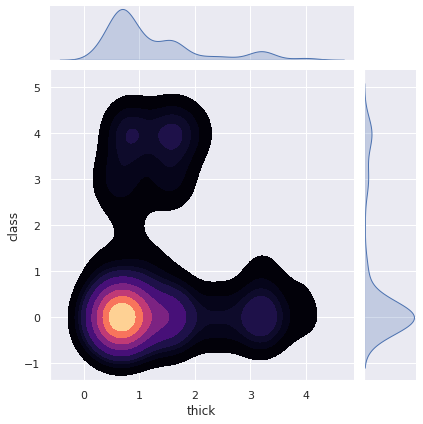

In [69]:
sns.jointplot(data = df , x = 'thick' , y = 'class', kind = 'kde', fill = True, cmap = 'magma')

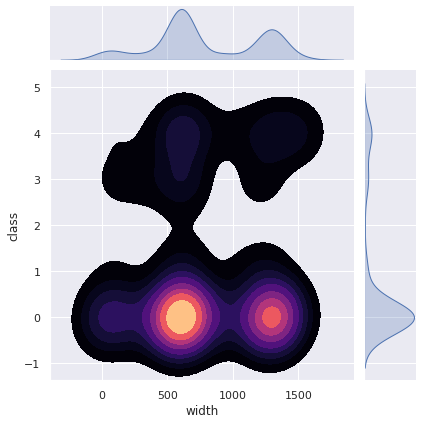

In [70]:
sns.jointplot(data = df , x = 'width' , y = 'class', kind = 'kde', fill = True, cmap = 'magma')

### Subpart2

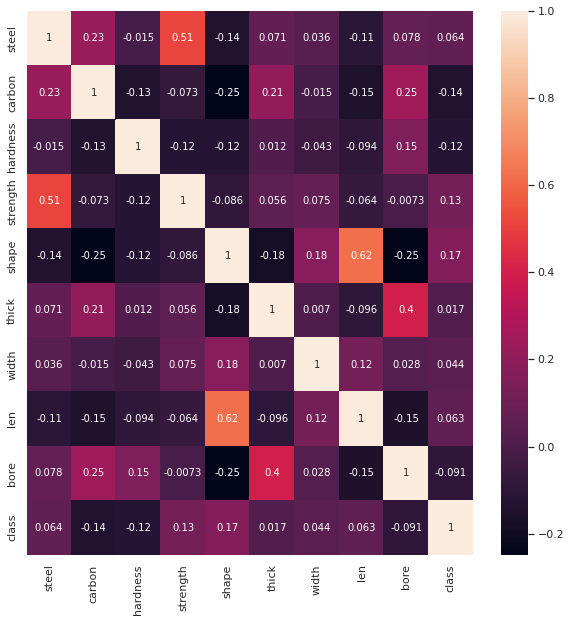

In [73]:
fig = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

In [26]:
X = np.array(df.iloc[0:len(df)-83 , 0:-1])
X_test_og = np.array(df.iloc[len(df)-83: , 0:-1])
y_test_og = np.array(df.iloc[len(df)-83: , -1])
y = np.array(df.iloc[0:len(df)-83  , -1])

In [27]:
X_train1,X_test1, y_train1, y_test1 = tts(X,y,test_size = 0.35, random_state = 12)

### Subpart3

In [28]:
models = {'DecisionTree'  : DecisionTreeClassifier() , 'GaussianClassifier' : GaussianNB() , 'RandomForest' : ensemble.RandomForestClassifier()}

In [29]:
results = {}

In [30]:
for model in models:
    results[model] = cvs(models[model], X_train1, y_train1, cv=5, scoring='accuracy')

In [31]:
results

{'DecisionTree': array([0.89473684, 0.93684211, 0.92553191, 0.93617021, 0.86170213]),
 'GaussianClassifier': array([0.29473684, 0.30526316, 0.28723404, 0.28723404, 0.35106383]),
 'RandomForest': array([0.92631579, 0.94736842, 0.93617021, 0.91489362, 0.85106383])}

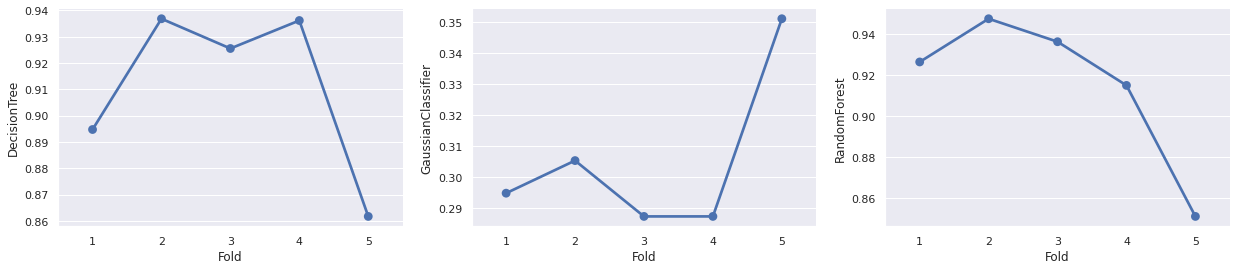

In [32]:
df_ = pd.DataFrame()
df_['DecisionTree'] = results['DecisionTree']
df_['GaussianClassifier'] = results['GaussianClassifier']
df_['RandomForest'] = results['RandomForest']
df_['Fold'] = [i+1 for i in range(0, 5)]
fig, axes = plt.subplots(1,3,figsize=(21,4))
sns.pointplot(x = 'Fold', y = 'DecisionTree', data = df_, ax=axes[0])
sns.pointplot(x = 'Fold', y = 'GaussianClassifier', data = df_, ax = axes[1])
sns.pointplot(x = 'Fold', y = 'RandomForest', data = df_, ax = axes[2])

###Subpart4

In [33]:
class pca:
    def __init__(self, components):
        self.components = components
        self.eigenComponents = None
    def highImpactFeatures(self,X):
      res = [i for i in range(X.shape[1])]
      vector = self.eigenComponents[0]
      idxs = np.argsort(abs(vector))[::-1]
      res = np.array(res)[idxs]
      return res
    def standardScaler(self,X_): ## Scaling of the data
        X = X_.copy()
        for i in range(X.shape[1]):
            mean = np.mean(X[:,i])
            sd = np.std(X[:,i])
            for j in range(len(X[:, i])):
                X[:,i][j] = (X[:,i][j] - mean)/sd
        return X
    def cov(self,x,y): ## Covariance Matrix
        if len(x) != len(y):
            return "Error (Length not same)"
        sum = 0
        meanx = np.mean(x)
        meany = np.mean(y)
        for i in range(len(x)):
            sum += ((x[i] - meanx) * (y[i] - meany))
        return sum / len(x)
    def covarianceMatrix(self, X):
        arr = np.ones((X.shape[1], X.shape[1]))
        for i in range(X.shape[1]):
            for j in range(X.shape[1]):
                if i!=j:
                    arr[i][j] = self.cov(X[:,i], X[:,j])
                else:
                    arr[i][j] = np.var(X[:,i])
        return arr
    def norm(self,u):
        s = 0
        for i in u:
            s += i**2
        return s**0.5
    def qrDecomposition(self,A):
        Q = np.zeros(A.shape)
        R = np.zeros(A.shape)
        a_s = [A[:,i].copy() for i in range(A.shape[1])]
        e_s = []
        for a in a_s:
            for e in e_s:
                a = a - float(np.matmul(a,e)) * e
            u = -a / self.norm(a)
            e_s.append(u)
        for i in range(A.shape[1]):
            Q[:,i] = e_s[i].T
        for i in range(A.shape[1]):
            for j in range(A.shape[1]):
                if j>=i:
                    R[i][j] = float(np.matmul(a_s[j], e_s[i]))
        return Q,R
    def eigenDecomposition(self,X, iterations = 1000): ## Function to get eigenvalues and eigenvectors
        eigenVals = []
        Q = np.zeros(X.shape)
        Q_ = []
        R = np.zeros(X.shape)
        for i in range(iterations):
            Q,R = self.qrDecomposition(X)
            if i == 0:
                Q_ = Q
            else:
                Q_ = np.matmul(Q_ , Q)
            X = np.matmul(R,Q)
        for i in range(X.shape[1]):
            eigenVals.append(X[i][i])
        return eigenVals , [Q_[:,i].copy() for i in range(Q_.shape[1])]
    def fit(self,X_):
        X = X_.copy()
        X = self.standardScaler(X)
        co = self.covarianceMatrix(X)
        e, ev = self.eigenDecomposition(co)
        eigenList = []
        for ix,i in enumerate(e):
            l=[i , ev[ix]]
            eigenList.append(l)
        eigenList = sorted(eigenList , reverse=True)
        finalVectors = np.array([eigenList[i][1] for i in range(self.components)])
        self.eigenComponents = finalVectors
        return e,ev
    def transform(self,X):
        X_ = X.copy()
        print()
        # return np.matmul(self.eigenComponents , X_.T).T 
        return np.matmul(X_ , self.eigenComponents.T)  

### Subpart5

In [74]:
pc = pca(2)
e,ev = pc.fit(X)
d = pc.transform(X)

In [75]:
tr = ensemble.RandomForestClassifier()
X_train, X_test , y_train, y_test = tts(d, y, test_size=0.35, random_state=10)
tr.fit(X_train, y_train)
print(accuracy_score(y_test, tr.predict(X_test))*100,'%')

78.43137254901961 %


In [76]:
models = {'DecisionTree'  : DecisionTreeClassifier() , 'GaussianClassifier' : GaussianNB() , 'RandomForest' :ensemble.RandomForestClassifier() }

for model in models:
    results[model] = cvs(models[model], X_train, y_train, cv=5)

In [77]:
X_train,X_test, y_train, y_test = tts(X,y,test_size = 0.35, random_state = 12)

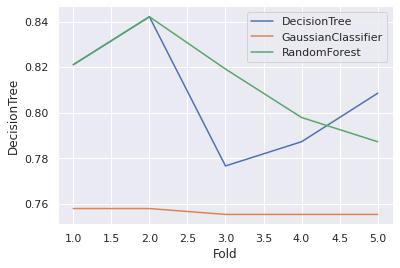

In [78]:
fig, axes = plt.subplots()
df_ = pd.DataFrame()
df_['DecisionTree'] = results['DecisionTree']
df_['GaussianClassifier'] = results['GaussianClassifier']
df_['Models'] = results['RandomForest']
df_['Fold'] = [i+1 for i in range(0, 5)]
sns.lineplot(x = 'Fold', y = 'DecisionTree', data = df_, palette = 'magma')
sns.lineplot(x = 'Fold', y = 'GaussianClassifier', data = df_,palette='magma')
sns.lineplot(x = 'Fold', y = 'Models', data = df_, palette = 'magma')
plt.legend(labels=["DecisionTree","GaussianClassifier","RandomForest"])

### Subpart6

In [104]:
X_trainp, X_testp , y_trainp, y_testp = tts(d, y, test_size=0.35, random_state=10)
metric = {'Accuracy':accuracy_score}
results = {}
for i in models:
    results[i] = {}
for mod in models:
    for me in metric:
        results[mod][me] = [metric[me](y_testp ,models[mod].fit(X_trainp,y_trainp).predict(X_testp)), metric[me](y_test ,models[mod].fit(X_train,y_train).predict(X_test))]

In [105]:
metric = {'f1Score':metrics.f1_score}
for mod in models:
    for me in metric:
        results[mod][me] = [metric[me](y_testp ,models[mod].fit(X_trainp,y_trainp).predict(X_testp), average='macro'), metric[me](y_test ,models[mod].fit(X_train,y_train).predict(X_test), average = 'macro')]

In [108]:
results
for mod in results:
  print(mod+' :')
  print('With PCA Accuracy :',results[mod]['Accuracy'][0])
  print('Without PCA Accuracy :',results[mod]['Accuracy'][1]) 
  print('With PCA f1Score :',results[mod]['f1Score'][0])
  print('Without PCA f1Score :',results[mod]['f1Score'][1])

DecisionTree :
With PCA Accuracy : 0.7607843137254902
Without PCA Accuracy : 0.8117647058823529
With PCA f1Score : 0.6610407876230662
Without PCA f1Score : 0.7439237206386936
GaussianClassifier :
With PCA Accuracy : 0.788235294117647
Without PCA Accuracy : 0.5294117647058824
With PCA f1Score : 0.17631578947368423
Without PCA f1Score : 0.39242029075934365
RandomForest :
With PCA Accuracy : 0.7607843137254902
Without PCA Accuracy : 0.8588235294117647
With PCA f1Score : 0.6053316222364813
Without PCA f1Score : 0.7341199528440908


In [82]:
dfPca = pd.DataFrame(d)
dfPca.columns = ['PC1','PC2']
dfPca['class'] = y

### Subpart7

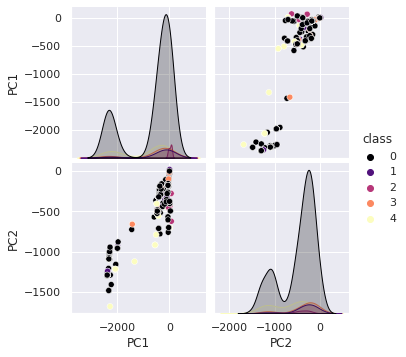

In [83]:
sns.pairplot(dfPca, hue = 'class', palette = 'magma') ## 2 components were used

In [84]:
f1 = metrics.f1_score
res = []

for i in range(1, 10):
    pc = pca(i)
    pc.fit(X)
    d_= pc.transform(X)
    xtr,xte,ytr,yte = tts(d_ , y , test_size=0.2, random_state=10)
    tr = ensemble.RandomForestClassifier()
    tr.fit(xtr , ytr)
    y_pred = tr.predict(xte)
    res.append(f1(yte, y_pred, average='macro'))

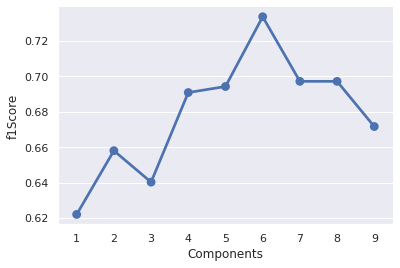

In [85]:
df_ = pd.DataFrame()
df_['f1Score'] = res
df_['Components'] = [i for i in range(1,10)]
sns.pointplot(x = 'Components', y = 'f1Score', data = df_)

In [86]:
variance = []
listEigen = [[e[i],ev[i]] for i in range(len(e))]
s = 0
for i in listEigen:
    s += i[0]
for i in range(len(listEigen)):
    listEigen[i][0] = listEigen[i][0] / s
    variance.append(listEigen[i][0]* 100)

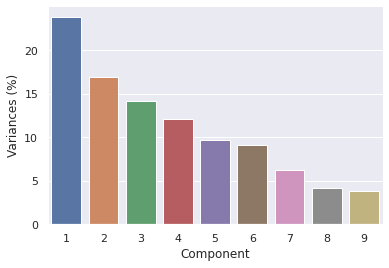

In [87]:
df_ = pd.DataFrame()
df_['Variances (%)'] = variance
df_['Component'] = [i for i in range(1,10)]
sns.barplot(x = 'Component', y = 'Variances (%)', data = df_)

## Question 2

In [88]:
class lda:
    def __init__(self, autoComponents,components=2,var = 0):
        self.components = components
        self.classWithinMatrix = None
        self.classBetweenMatrix = None
        self.classWiseMatrix = {}
        self.linear_discriminants = None
        self.autoComponents = autoComponents
        self.var = var
        self.model = ensemble.RandomForestClassifier()
    def componentsSelector(self,var, eev_): ## b. Function that automatically selects the number of linear discriminants
        eev = eev_.copy()
        s = 0
        for i in eev:
            s += abs(i[0])
        for i in range(len(eev)):
            eev[i][0] = abs(eev[i][0]) / s
        c = 0
        count = 0
        while c <= var and count < len(eev):
            c += eev[count][0]
            count += 1
        return count
    def classSpecificMatrix(self,X_, clas):
        X = X_.astype('float32').copy()
        meanV = [np.mean(X[:,i].copy()) for i in range(X.shape[1])]
        for i in range(len(X)):
            X[i] = X[i] - meanV
        s = np.zeros((X.shape[1], X.shape[1]))
        for row in X:
            temp = np.dot(row.reshape(row.shape + (1,)), np.array([row]))
            s += temp
        self.classWiseMatrix[clas] = s
        return s
    def withinClassMatrix(self,X,y): ## a. Within Class Matrix
        classes = np.unique(y.copy())
        s = np.zeros((X.shape[1], X.shape[1]))
        for cla in classes:
            s += self.classSpecificMatrix(X[y == cla].copy(), cla)
        return s
    def betweenClassMatrix(self,X,y): ## a. Between Class Matrix
        meanOverall = np.array([np.mean(X[:,i]) for i in range(X.shape[1])]).astype('float32')
        classes = np.unique(y.copy())
        s = np.zeros((X.shape[1], X.shape[1]))
        for cla in classes:
            ni = len(X[y == cla])
            meanClass = np.array([np.mean(X[y == cla].copy()[:,i]) for i in range(X.shape[1])]).astype('float32')
            meanClass = meanClass - meanOverall
            temp = np.dot(meanClass.reshape(meanClass.shape + (1,)), np.array([meanClass]))
            s+= ni * temp
        return s
    def norm(self,u):
        s = 0
        for i in u:
            s += i**2
        return s**0.5
    def qrDecomposition(self,A):
        Q = np.zeros(A.shape)
        R = np.zeros(A.shape)
        a_s = [A[:,i].copy() for i in range(A.shape[1])]
        e_s = []
        for a in a_s:
            for e in e_s:
                a = a - float(np.matmul(a,e)) * e
            u = -a / self.norm(a)
            e_s.append(u)
        for i in range(A.shape[1]):
            Q[:,i] = e_s[i].T
        for i in range(A.shape[1]):
            for j in range(A.shape[1]):
                if j>=i:
                    R[i][j] = float(np.matmul(a_s[j], e_s[i]))
        return Q,R
    def eigenDecomposition(self,X, iterations = 1000):
        eigenVals = []
        Q = np.zeros(X.shape)
        Q_ = []
        R = np.zeros(X.shape)
        for i in range(iterations):
            Q,R = self.qrDecomposition(X)
            if i == 0:
                Q_ = Q
            else:
                Q_ = np.matmul(Q_ , Q)
            X = np.matmul(R,Q)
        for i in range(X.shape[1]):
            eigenVals.append(X[i][i])
        return eigenVals , [Q_[:,i].copy() for i in range(Q_.shape[1])]
    def finalMatrix(self,sw,sb):
        return np.dot(np.linalg.inv(sw) , sb)
    def fit(self,X,y):
        SW = self.withinClassMatrix(X,y)
        SB = self.betweenClassMatrix(X,y)
        self.withinClassMatrix = SW
        self.betweenClassMatrix = SB
        A = self.finalMatrix(SW,SB)
        eigenvalues, eigenvectors = self.eigenDecomposition(A)
        eigenvalues = np.array(eigenvalues)
        eigenvectors = np.array(eigenvectors)
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        if self.autoComponents == True:
            self.components = self.componentsSelector(self.var , [[eigenvalues[i].copy(), eigenvectors[i].copy()] for i in range(len(eigenvalues))])
        self.linear_discriminants = eigenvectors[0:self.components]
        self.model.fit(np.dot(X, self.linear_discriminants.T),y)
    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)
    def highImpactFeatures(self,X):
      res = [i for i in range(X.shape[1])]
      vector = self.linear_discriminants[0]
      idxs = np.argsort(abs(vector))[::-1]
      res = np.array(res)[idxs]
      return res
    def predict(self,xte):
        return self.model.predict(xte)
    def predict_proba(self,xte):
        return self.model.predict_proba(xte)

### Subpart2

In [89]:
pc = pca(4)
ld = lda(False,4)
pc.fit(X)
ld.fit(X,y)
X_pc_tr = np.array(pc.transform(X_train))
X_pc = np.array(pc.transform(X_test_og))
X_ld_tr = np.array(ld.transform(X_train))
X_ld = np.array(ld.transform(X_test_og))
print('PCA (RandomForest)(Accuracy) -->',metrics.accuracy_score(y_test_og,ensemble.RandomForestClassifier().fit(X_pc_tr,y_train).predict(X_pc) ))
print('LDA (RandomForest)(Accuracy) -- >',metrics.accuracy_score(y_test_og,ensemble.RandomForestClassifier().fit(X_ld_tr,y_train).predict(X_ld) ))
print('PCA (RandomForest)(F1score) -->',metrics.f1_score(y_test_og,ensemble.RandomForestClassifier().fit(X_pc_tr,y_train).predict(X_pc) ,average='macro'))
print('LDA (RandomForest)(F1score) -- >',metrics.f1_score(y_test_og,ensemble.RandomForestClassifier().fit(X_ld_tr,y_train).predict(X_ld) ,average='macro'))



PCA (RandomForest)(Accuracy) --> 0.8433734939759037
LDA (RandomForest)(Accuracy) -- > 0.9156626506024096
PCA (RandomForest)(F1score) --> 0.47188811188811197
LDA (RandomForest)(F1score) -- > 0.8381124913733609


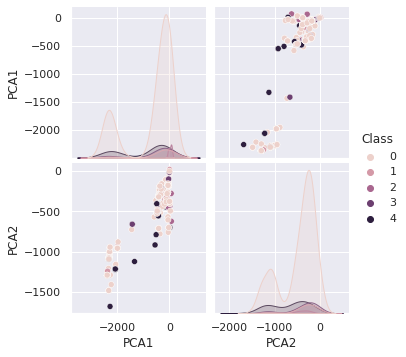

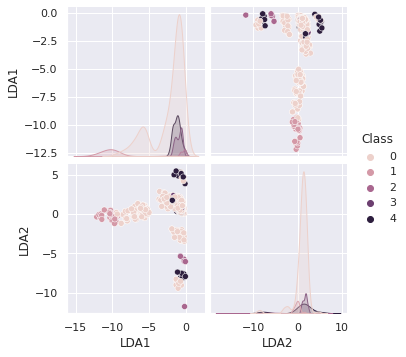

In [90]:
pc = pca(2)
ld = lda(False)
pc.fit(X)
ld.fit(X,y)
X_pc = np.array(pc.transform(X))
X_ld = np.array(ld.transform(X))
df_pca = pd.DataFrame()
df_lda = pd.DataFrame()
df_pca['PCA1'] = X_pc[:,0]
df_pca['PCA2'] = X_pc[:,1]
df_lda['LDA1'] = X_ld[:,0]
df_lda['LDA2'] = X_ld[:,1]
df_pca['Class'] = y
df_lda['Class'] = y
sns.pairplot(df_pca, hue = 'Class')
sns.pairplot(df_lda, hue = 'Class')

### Subpart3

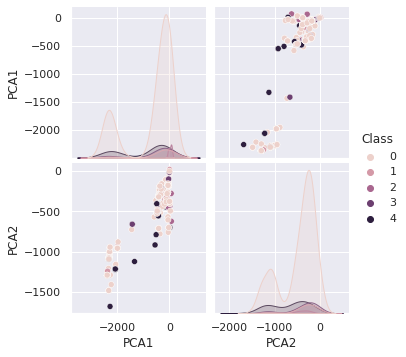

In [91]:
pc = pca(2)
ld = lda(False)
pc.fit(X)
ld.fit(X,y)
X_pc = np.array(pc.transform(X))
X_ld = np.array(ld.transform(X))
df_pca = pd.DataFrame()
df_lda = pd.DataFrame()
df_pca['PCA1'] = X_pc[:,0]
df_pca['PCA2'] = X_pc[:,1]
df_lda['LDA1'] = X_ld[:,0]
df_lda['LDA2'] = X_ld[:,1]
df_pca['Class'] = y
df_lda['Class'] = y
sns.pairplot(df_pca, hue = 'Class')

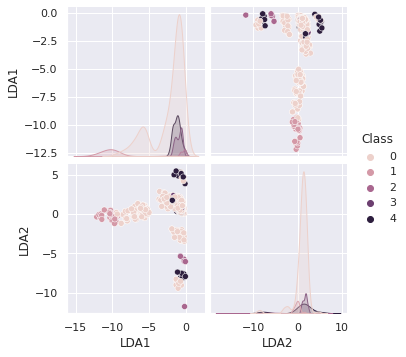

In [92]:
sns.pairplot(df_lda, hue = 'Class')

In [93]:
## Getting features with highest Impact ## Code is available in the classes defined above
ld = lda(False)
ld.fit(X,y)
resultsLDA = ld.highImpactFeatures(X)
ld = pca(2)
ld.fit(X)
resultsPCA = ld.highImpactFeatures(X)
print('Best features PCA :')
for i in resultsPCA:
  print(i, end = ' ')
print()
print('Best features LDA :')
for i in resultsLDA:
  print(i, end = ' ')

Best features PCA :
4 7 8 1 5 0 3 2 6 
Best features LDA :
5 8 4 2 0 1 3 6 7 

### Subpart4

In [94]:
dicResults = {'RandomForest':{} , 'GaussianNB':{}}
pc = pca(4)
ld = lda(False,4)
pc.fit(X)
ld.fit(X,y)
X_pc_tr = np.array(pc.transform(X_train))
X_pc = np.array(pc.transform(X_test_og))
X_ld_tr = np.array(ld.transform(X_train))
X_ld = np.array(ld.transform(X_test_og))
dicResults['RandomForest']['PCA'] = metrics.accuracy_score(y_test_og,ensemble.RandomForestClassifier().fit(X_pc_tr,y_train).predict(X_pc) )
dicResults['RandomForest']['LDA'] = metrics.accuracy_score(y_test_og,ensemble.RandomForestClassifier().fit(X_ld_tr,y_train).predict(X_ld) )
dicResults['GaussianNB']['PCA'] = metrics.accuracy_score(y_test_og,naive_bayes.GaussianNB().fit(X_pc_tr,y_train).predict(X_pc) )
dicResults['GaussianNB']['LDA'] = metrics.accuracy_score(y_test_og,naive_bayes.GaussianNB().fit(X_ld_tr,y_train).predict(X_ld) )

In [95]:
print('      RandomForest       ','GaussianNB')
print('LDA',dicResults['RandomForest']['LDA'],dicResults['GaussianNB']['LDA'])
print('PCA',dicResults['RandomForest']['PCA'],dicResults['GaussianNB']['PCA'])

## Better Results were obtained in the case of PCA and RandomForestClassifier, PCA gave better results overall.

      RandomForest        GaussianNB
LDA 0.927710843373494 0.5301204819277109
PCA 0.8433734939759037 0.6746987951807228


### Subpart5

In [96]:
def truePositive(yt, y):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for ix,i in enumerate(yt):
        if i == y[ix] and y[ix] == 1:
            tp += 1
        elif i == y[ix] and y[ix] != 1:
            tn +=1
        elif i != y[ix] and y[ix] == 1:
            fp +=1
        elif i!= y[ix] and y[ix] != 1:
            fn += 1
    if tp == 0:
        return tp
    return float(tp / (tp + fn))
def falsePositive(yt, y):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for ix,i in enumerate(yt):
        if i == y[ix] and y[ix] == 1:
            tp += 1
        elif i == y[ix] and y[ix] != 1:
            tn +=1
        elif i != y[ix] and y[ix] == 1:
            fp +=1
        elif i!= y[ix] and y[ix] != 1:
            fn += 1
    if fp == 0:
        return fp
    return float(fp / (fp + tn))

In [97]:
## Function to get the points for the ROC Curve

def ROCpoints(Xtr,ytr,Xte,yte, model):
    area = []
    thresholds = np.linspace(-0.01,1.01,100)
    model.fit(Xtr,ytr) 
    Xte = model.transform(Xte)
    yProb = np.array(model.predict_proba(Xte))
    mainArray = {}
    for cla in range(len(np.unique(ytr))):
        yClass = yte.copy()
        yClass[yte != cla] = -1
        yClass[yte == cla] = 1
        yProbClass = yProb.copy()
        points = []
        for th in thresholds:
            ypredClass = []
            for ix,predi in enumerate(yProbClass):
                if predi[cla] >= th:
                    ypredClass.append(1)
                else:
                    ypredClass.append(-1)
            points.append([falsePositive(yClass,ypredClass),truePositive(yClass,ypredClass)])
        mainArray[cla] = np.array(points)
    return mainArray

In [98]:
ld = lda(False)
ld.fit(X,y)
X_ = ld.transform(X)
X_train,X_test,y_train,y_test = tts(X_,y,test_size=0.35, random_state=12)

In [99]:
def auc(points):
    xaxis = points[:,0][::-1].copy()
    yaxis = points[:,1][::-1].copy()
    s = 0.0
    for i in range(len(xaxis) - 1):
        s += float(0.5 * (xaxis[i+1] - xaxis[i]) * (yaxis[i+1]+yaxis[i]))
    return s

In [100]:
k = kf()
dicfold = {}
count = 1
for train_index, test_index in k.split(X):
    Xtr, Xte = X[train_index].copy(), X[test_index].copy()
    ytr, yte = y[train_index].copy(), y[test_index].copy()
    rocCurve = ROCpoints(Xtr,ytr,Xte,yte,lda(False))
    dicfold[count] = rocCurve
    count += 1

In [101]:
FoldsAUC = {}
for fold in dicfold:
    l  = dicfold[fold]
    dicArea = {}
    for cla in l:
        dicArea[cla] = auc(l[cla])
    FoldsAUC[fold] = dicArea
## Dictionary containg the auc for different classes and folds

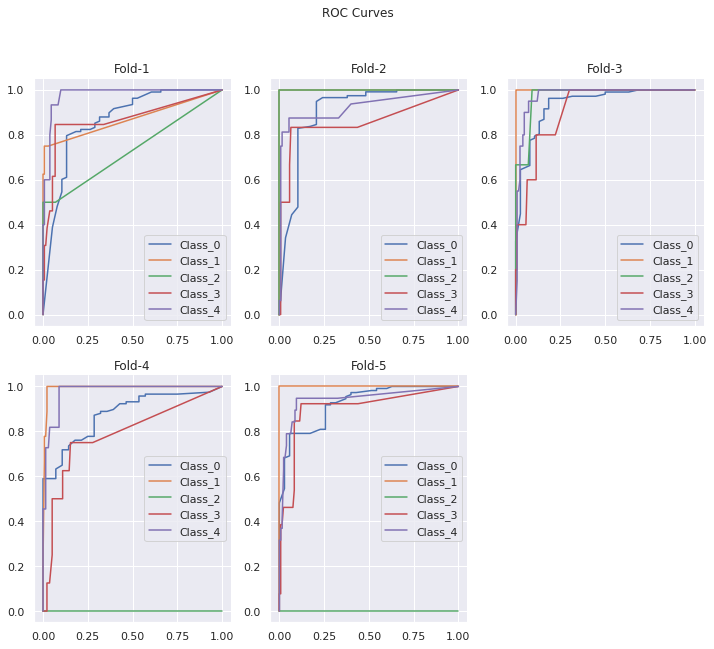

In [102]:
figure, axes = plt.subplots(2,3,figsize = (12,10))
def ROCcurve(l,x,y,fold):
    for cla in l:
        xaxis = l[cla][:,0]
        yaxis = l[cla][:,1]
        axes[x,y].plot(xaxis,yaxis)
        axes[x,y].set_title('Fold-'+str(fold))
    axes[x,y].legend(['Class_'+str(cla) for cla in l])
ROCcurve(dicfold[1],0,0,1)
ROCcurve(dicfold[2],0,1,2)
ROCcurve(dicfold[3],0,2,3)
ROCcurve(dicfold[4],1,0,4)
ROCcurve(dicfold[5],1,1,5)
figure.suptitle('ROC Curves')
axes[1,2].remove()
plt.show()

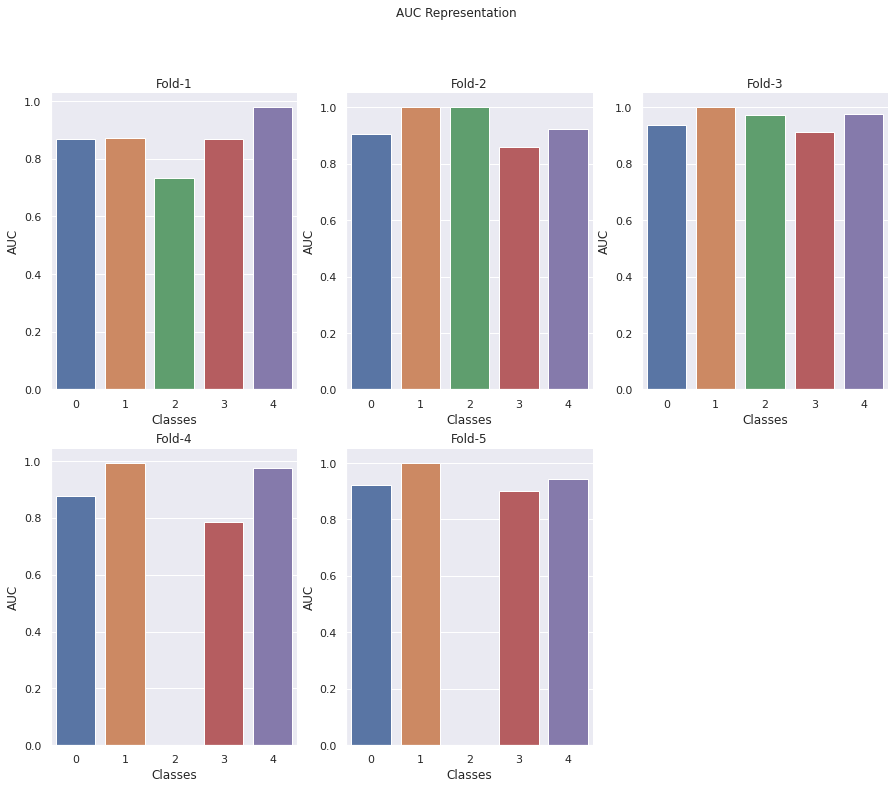

In [103]:
figure, axes = plt.subplots(2,3,figsize = (15,12))
def AUCcurve(l,x,y,fold):
    areas = [l[i] for i in l]
    classes = [i for i in l]
    df_ = pd.DataFrame()
    df_['AUC'] = areas
    df_['Classes'] = classes
    sns.barplot(x = 'Classes', y = 'AUC', data = df_, ax=axes[x,y])
    axes[x,y].set_title('Fold-'+str(fold))
AUCcurve(FoldsAUC[1],0,0,1)
AUCcurve(FoldsAUC[2],0,1,2)
AUCcurve(FoldsAUC[3],0,2,3)
AUCcurve(FoldsAUC[4],1,0,4)
AUCcurve(FoldsAUC[5],1,1,5)
figure.suptitle('AUC Representation')
axes[1,2].remove()
plt.show()